In [1]:
import numpy as np
import pandas as pd
import lasio
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# df_well_list = pd.read_csv('welldata.csv')

# df_well_list.head()

allmeasurement = []
for i in os.listdir(os.getcwd()+'/wells'):
    print(i)
    allmeasurement.append(pd.read_csv(f'wells/{i}'))

Jin112.csv
Jin98.csv


In [3]:
df = pd.concat(allmeasurement)
df.head()

,DEPTH,AC,DEN,GR,LITH,PHIE,PHIT,PVEL,PVELM,DENM,SVEL,SVELM,VCOAL,VDCL,VPVS,VPVSM,VQUA
0,301.000,214.537,-9999.0,63.3504,-9999,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0
1,301.125,222.195,-9999.0,65.6244,-9999,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0
2,301.250,234.910,-9999.0,67.7714,-9999,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0
3,301.375,248.743,-9999.0,68.5904,-9999,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0
4,301.500,264.075,-9999.0,67.8864,-9999,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0


## Exploratory Data Analysis
Data Statistics

In [4]:
# Drop first column of dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DEPTH,48124.0,1762.002338,868.885660,215.8750,1010.343750,1762.2500,2514.15625,3284.0000
AC,48124.0,141.948291,1091.504077,-9999.0000,231.765575,258.2627,282.64090,458.6140
DEN,48124.0,-4822.668144,4995.448154,-9999.0000,-9998.941500,0.0000,0.00000,108.9614
GR,48124.0,40.674180,694.350074,-10004.0466,74.692075,83.9914,98.98690,480.3322
LITH,48124.0,-8906.439822,3119.912665,-9999.0000,-9999.000000,-9999.0000,-9999.00000,4.0000
PHIE,48124.0,0.006668,0.022643,0.0000,0.000000,0.0000,0.00000,0.3016
PHIT,48124.0,-879.066603,324.716822,-999.0000,-999.000000,-999.0000,-999.00000,0.3759
PVEL,48124.0,-401.630059,1694.152258,-999.0000,-999.000000,-999.0000,-999.00000,6291.4748
PVELM,48124.0,-426.348438,1646.478886,-999.0000,-999.000000,-999.0000,-999.00000,5605.2363
DENM,48124.0,-889.594537,312.418024,-999.0000,-999.000000,-999.0000,-999.00000,2.7178


## Check Missing Log

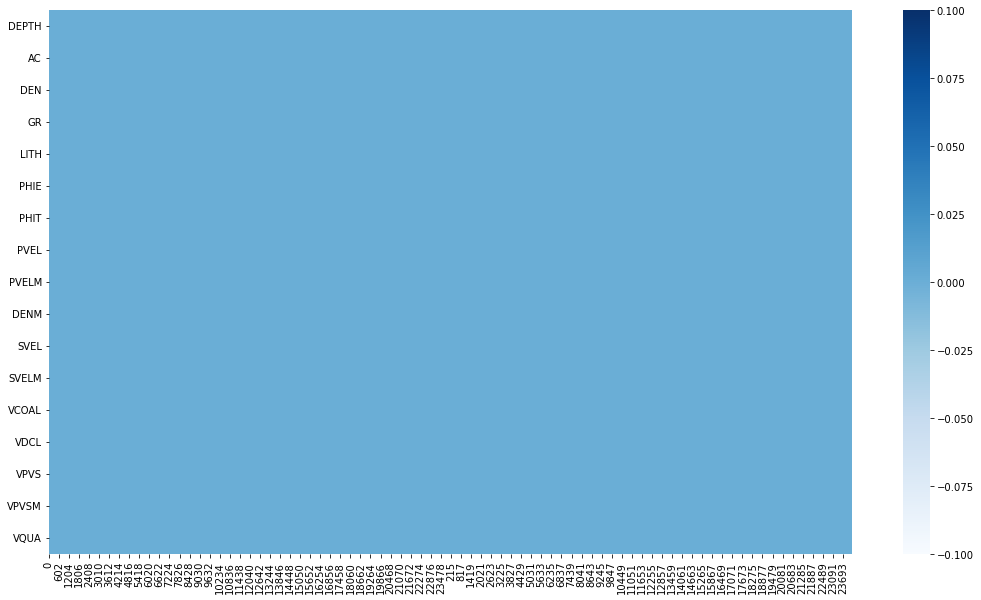

In [5]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.isna().T, cmap='Blues');

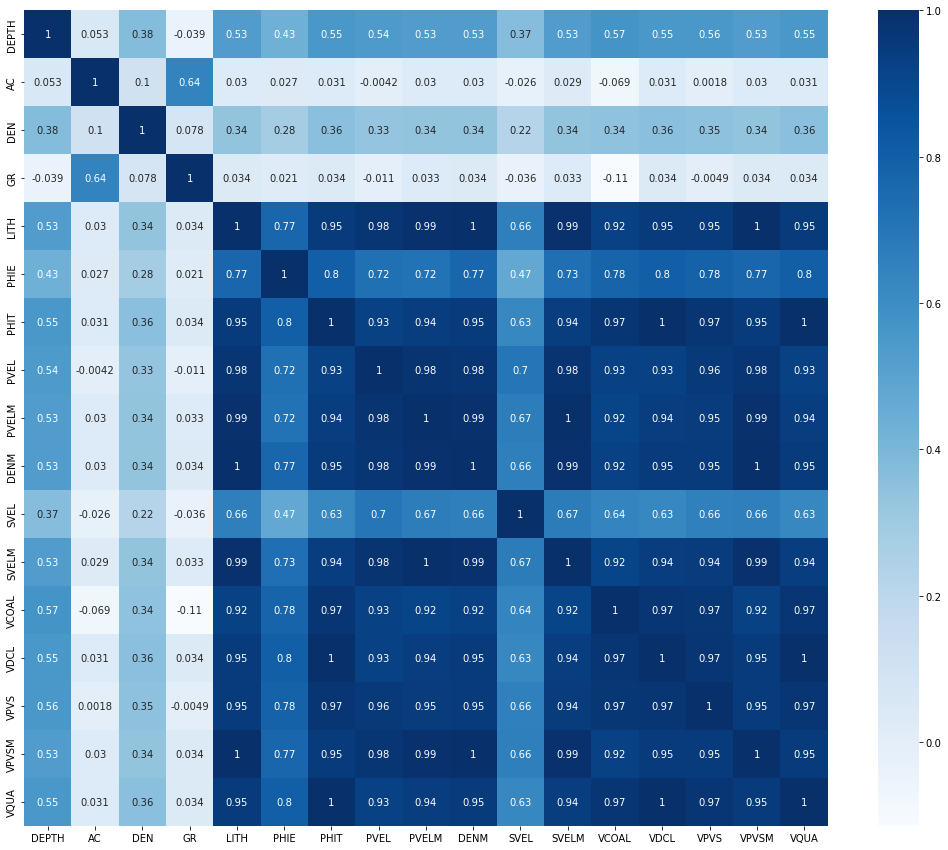

In [6]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

In [7]:
df.replace([-999.00,-9999], np.nan, inplace=True)
df.isnull().sum()

DEPTH        0
AC         551
DEN       2252
GR           1
LITH     42867
PHIE         0
PHIT     42347
PVEL     42746
PVELM    42867
DENM     42867
SVEL     45420
SVELM    42867
VCOAL    42065
VDCL     42347
VPVS     42386
VPVSM    42867
VQUA     42347
dtype: int64

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)

In [9]:
print(missing_value_df.to_string())

      column_name  percent_missing
DEPTH       DEPTH         0.000000
PHIE         PHIE         0.000000
GR             GR         0.002078
AC             AC         1.144959
DEN           DEN         4.679578
VCOAL       VCOAL        87.409609
VDCL         VDCL        87.995595
VQUA         VQUA        87.995595
PHIT         PHIT        87.995595
VPVS         VPVS        88.076635
PVEL         PVEL        88.824703
VPVSM       VPVSM        89.076137
DENM         DENM        89.076137
SVELM       SVELM        89.076137
LITH         LITH        89.076137
PVELM       PVELM        89.076137
SVEL         SVEL        94.381182


In [10]:
df_well_list = df.dropna()

In [11]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_well_list.corr()
corr.style.background_gradient(cmap='coolwarm')

,DEPTH,AC,DEN,GR,LITH,PHIE,PHIT,PVEL,PVELM,DENM,SVEL,SVELM,VCOAL,VDCL,VPVS,VPVSM,VQUA
DEPTH,1.000000,-0.326928,0.086265,0.185160,0.002097,-0.339457,-0.486352,0.564538,0.548698,0.438627,0.532409,0.505139,0.160563,0.037761,-0.194720,-0.369373,-0.043199
AC,-0.326928,1.000000,-0.782839,-0.159479,0.331510,0.326678,0.454867,-0.774145,-0.406300,-0.637843,-0.553099,-0.704362,0.590202,-0.141478,-0.048992,0.329047,-0.418359
DEN,0.086265,-0.782839,1.000000,0.334154,-0.172261,-0.370307,-0.346497,0.380988,0.048857,0.619662,0.168638,0.337228,-0.728325,0.486228,0.185631,0.057483,0.149919
GR,0.185160,-0.159479,0.334154,1.000000,0.664893,-0.636836,-0.450363,0.067561,-0.056815,0.584031,-0.215491,-0.250685,-0.033664,0.908733,0.404998,0.646487,-0.782140
LITH,0.002097,0.331510,-0.172261,0.664893,1.000000,-0.478985,-0.280398,-0.231858,-0.063854,0.228804,-0.395592,-0.436653,0.408007,0.593671,0.334198,0.606485,-0.842960
PHIE,-0.339457,0.326678,-0.370307,-0.636836,-0.478985,1.000000,0.936124,-0.416588,-0.583794,-0.903764,-0.166520,-0.341404,-0.208765,-0.574862,-0.204376,-0.108577,0.513135
PHIT,-0.486352,0.454867,-0.346497,-0.450363,-0.280398,0.936124,1.000000,-0.602425,-0.813243,-0.918561,-0.383901,-0.618676,-0.242296,-0.346050,-0.078662,0.211974,0.292477
PVEL,0.564538,-0.774145,0.380988,0.067561,-0.231858,-0.416588,-0.602425,1.000000,0.685274,0.622214,0.784780,0.810708,-0.173067,-0.055567,-0.060044,-0.510693,0.334013
PVELM,0.548698,-0.406300,0.048857,-0.056815,-0.063854,-0.583794,-0.813243,0.685274,1.000000,0.610027,0.621734,0.857510,0.402516,-0.235248,-0.192091,-0.661499,0.126349
DENM,0.438627,-0.637843,0.619662,0.584031,0.228804,-0.903764,-0.918561,0.622214,0.610027,1.000000,0.335003,0.549009,-0.119025,0.563816,0.187379,-0.030619,-0.255707


In [12]:
dff = df_well_list[['SVEL', 'PVEL', 'DENM','AC','LITH']]

## Model Building


Train Test Split

In [13]:
X = dff.drop(columns=['PVEL'])
y = dff['PVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2093, 4), (524, 4), (2093,), (524,))

## Data Scaling

In [14]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train Linear Regression Model

In [15]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

LinearRegression()

## Train Decision Tree Model

In [16]:
model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

## Train Random Forest Model

In [17]:
model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

RandomForestRegressor()

## Test Model

In [18]:
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

## Model Evaluation

In [19]:
acc_lr = np.round(r2_score(y_test, y_pred_lr), 3)
acc_dt = np.round(r2_score(y_test, y_pred_dt), 3)
acc_rf = np.round(r2_score(y_test, y_pred_rf), 3)

print('Model Linear Regression Accuracy = ', acc_lr)
print('Model Decision Tree Accuracy = ', acc_dt)
print('Model Random Forest Accuracy = ', acc_rf)

Model Linear Regression Accuracy =  0.809
Model Decision Tree Accuracy =  0.878
Model Random Forest Accuracy =  0.923


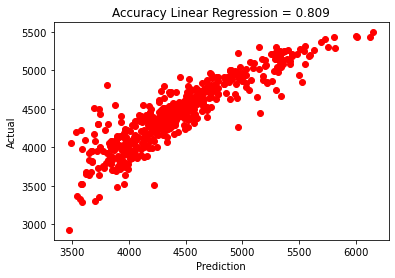

In [20]:
plt.scatter(y_test, y_pred_lr, color='red')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title(f'Accuracy Linear Regression = {acc_lr}')
plt.show()

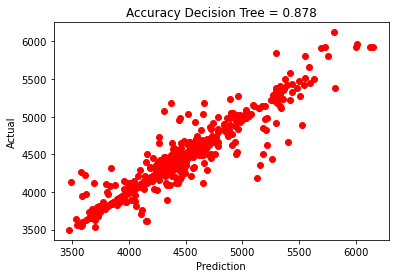

In [21]:
plt.scatter(y_test, y_pred_dt, color='red')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title(f'Accuracy Decision Tree = {acc_dt}')
plt.show()

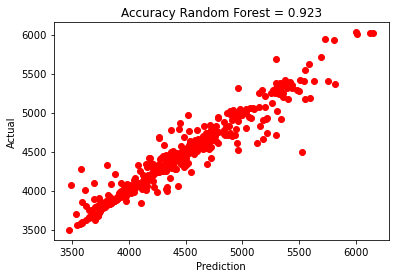

In [22]:
plt.scatter(y_test, y_pred_rf, color='red')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title(f'Accuracy Random Forest = {acc_rf}')
plt.show()

## Predict Blind Data

In [23]:
# Read Las and turn to pandas dataframe
val = pd.read_csv('blind/Jin86.csv')
val

,DEPTH,AC,DEN,GR,LITH,PHIE,PHIT,PVEL,PVELM,DENM,SVEL,SVELM,VCOAL,VDCL,VPVS,VPVSM,VQUA
0,303.000,297.160,-9999.0,58.6362,-9999,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0
1,303.125,291.901,-9999.0,58.5632,-9999,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0
2,303.250,285.325,-9999.0,57.8322,-9999,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0
3,303.375,281.862,-9999.0,57.1012,-9999,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0
4,303.500,286.787,-9999.0,57.6552,-9999,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23836,3282.500,0.000,-9999.0,10.0932,-9999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0
23837,3282.625,0.000,-9999.0,10.0932,-9999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0
23838,3282.750,-9999.000,-9999.0,-9988.9068,-9999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0
23839,3282.875,-9999.000,-9999.0,-9988.9068,-9999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0


In [24]:
val.replace([-999.00,-9999], np.nan, inplace=True)
val.isnull().sum()

DEPTH        0
AC           3
DEN      19628
GR           0
LITH     21305
PHIE       109
PHIT     21305
PVEL     21381
PVELM    21305
DENM     21305
SVEL     21381
SVELM    21305
VCOAL    21196
VDCL     21305
VPVS     20521
VPVSM    21305
VQUA     21305
dtype: int64

In [25]:
val_df = val.dropna()

In [26]:
val_df

,DEPTH,AC,DEN,GR,LITH,PHIE,PHIT,PVEL,PVELM,DENM,SVEL,SVELM,VCOAL,VDCL,VPVS,VPVSM,VQUA
21196,2952.500,209.7779,2.6068,72.9192,2.0,0.0353,0.0353,4767.1799,4824.9261,2.5984,2818.4148,2960.4544,0.0,0.2026,1.6914,1.6298,0.7621
21197,2952.625,230.9705,2.6170,87.2652,3.0,0.0524,0.0524,4329.7676,4457.8272,2.5746,2715.4183,2643.4558,0.0,0.3290,1.5945,1.6864,0.6186
21198,2952.750,248.1127,2.5600,103.8212,3.0,0.0842,0.0842,4030.6235,3988.8812,2.5257,2604.0999,2272.1301,0.0,0.4216,1.5478,1.7556,0.4942
21199,2952.875,266.1681,2.4700,116.9732,3.0,0.1272,0.1272,3757.2070,3496.9429,2.4568,2434.1393,1893.5256,0.0,0.4683,1.5435,1.8468,0.4045
21200,2953.000,277.8693,2.4142,123.2342,3.0,0.1549,0.1549,3598.9893,3222.5653,2.4122,2255.6358,1678.3570,0.0,0.4878,1.5956,1.9201,0.3573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23651,3259.375,206.0610,2.4920,165.9452,3.0,0.0464,0.0464,4661.8407,4314.3086,2.6122,2790.2123,2514.8663,0.0,0.4870,1.6708,1.7155,0.4666
23652,3259.500,207.9150,2.4800,164.0812,3.0,0.0526,0.0526,4626.8466,4254.2121,2.6007,2768.0706,2476.4662,0.0,0.4712,1.6715,1.7179,0.4762
23653,3259.625,212.7480,2.4760,162.7752,3.0,0.0600,0.0600,4601.7827,4159.6938,2.5886,2755.3265,2406.6300,0.0,0.4706,1.6701,1.7284,0.4694
23654,3259.750,217.7120,2.4760,162.5662,3.0,0.0660,0.0660,4592.3602,4068.9744,2.5794,2758.5533,2335.5071,0.0,0.4798,1.6648,1.7422,0.4541


In [27]:
fal = val_df[['SVEL', 'PVEL', 'DENM','AC','LITH']]

In [28]:
fal

,SVEL,PVEL,DENM,AC,LITH
21196,2818.4148,4767.1799,2.5984,209.7779,2.0
21197,2715.4183,4329.7676,2.5746,230.9705,3.0
21198,2604.0999,4030.6235,2.5257,248.1127,3.0
21199,2434.1393,3757.2070,2.4568,266.1681,3.0
21200,2255.6358,3598.9893,2.4122,277.8693,3.0
...,...,...,...,...,...
23651,2790.2123,4661.8407,2.6122,206.0610,3.0
23652,2768.0706,4626.8466,2.6007,207.9150,3.0
23653,2755.3265,4601.7827,2.5886,212.7480,3.0
23654,2758.5533,4592.3602,2.5794,217.7120,3.0


In [29]:
P_val = val_df['PVEL']
val = val_df[['SVEL', 'DENM','AC','LITH']]

In [30]:
# Data scalling
val_scaled = scaler.transform(val)

In [31]:
# Model prediction
P_val_pred_lr = model_lr.predict(val_scaled)
P_val_pred_rf = model_rf.predict(val_scaled)
P_val_pred_dt = model_dt.predict(val_scaled)

In [32]:
P_val_acc_lr = np.round(r2_score(P_val, P_val_pred_lr), 3)
P_val_acc_dt = np.round(r2_score(P_val, P_val_pred_rf), 3)
P_val_acc_rf = np.round(r2_score(P_val, P_val_pred_dt), 3)

print('Model Linear Regression Accuracy = ', P_val_acc_lr)
print('Model Decision Tree Accuracy = ', P_val_acc_dt)
print('Model Random Forest Accuracy = ', P_val_acc_rf)

Model Linear Regression Accuracy =  0.727
Model Decision Tree Accuracy =  0.832
Model Random Forest Accuracy =  0.773


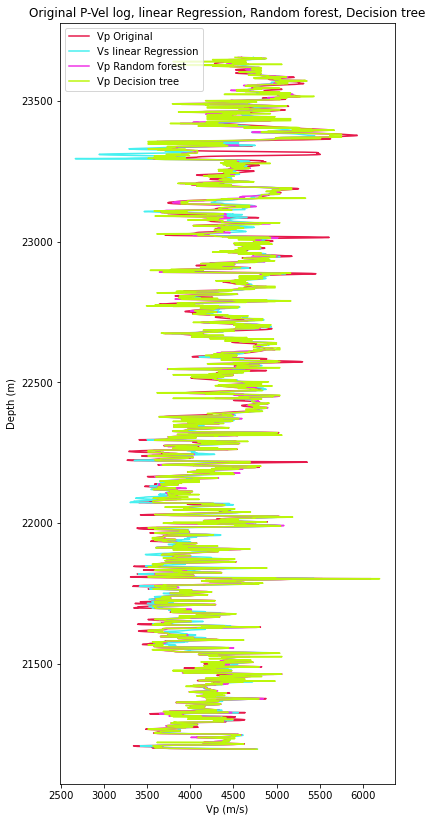

In [33]:
plt.figure(figsize=(6,14))
plt.plot(P_val, P_val.index.values, '#e6194b', label='Vp Original')
plt.plot(P_val_pred_lr, val.index.values, '#46f0f0', label='Vs linear Regression')
plt.plot(P_val_pred_rf, val.index.values, '#f032e6', label='Vp Random forest')
plt.plot(P_val_pred_dt, val.index.values, '#bcf60c', label='Vp Decision tree')
plt.title("Original P-Vel log, linear Regression, Random forest, Decision tree")
plt.ylabel("Depth (m)")
plt.xlabel("Vp (m/s)")
plt.legend()
plt.savefig('P-plot.png')
plt.show()

In [34]:
# Store back to dataframe
val['P-Vel lr'] = P_val_pred_lr
val['P-Vel rf'] = P_val_pred_rf
val['P-Vel dt'] = P_val_pred_dt
val['P-Vel'] = P_val

In [35]:
val

,SVEL,DENM,AC,LITH,P-Vel lr,P-Vel rf,P-Vel dt,P-Vel
21196,2818.4148,2.5984,209.7779,2.0,4777.702527,4748.558812,4774.2478,4767.1799
21197,2715.4183,2.5746,230.9705,3.0,4606.095362,4395.083248,4348.9675,4329.7676
21198,2604.0999,2.5257,248.1127,3.0,4367.996496,4106.786675,4133.8699,4030.6235
21199,2434.1393,2.4568,266.1681,3.0,4061.302746,3765.637869,3752.7888,3757.2070
21200,2255.6358,2.4122,277.8693,3.0,3813.363199,3646.853812,3702.5634,3598.9893
...,...,...,...,...,...,...,...,...
23651,2790.2123,2.6122,206.0610,3.0,4854.928418,4873.306971,4883.6136,4661.8407
23652,2768.0706,2.6007,207.9150,3.0,4815.493268,4792.730355,4765.2922,4626.8466
23653,2755.3265,2.5886,212.7480,3.0,4763.530465,4800.578539,4823.5709,4601.7827
23654,2758.5533,2.5794,217.7120,3.0,4725.241049,4633.548289,4614.6912,4592.3602


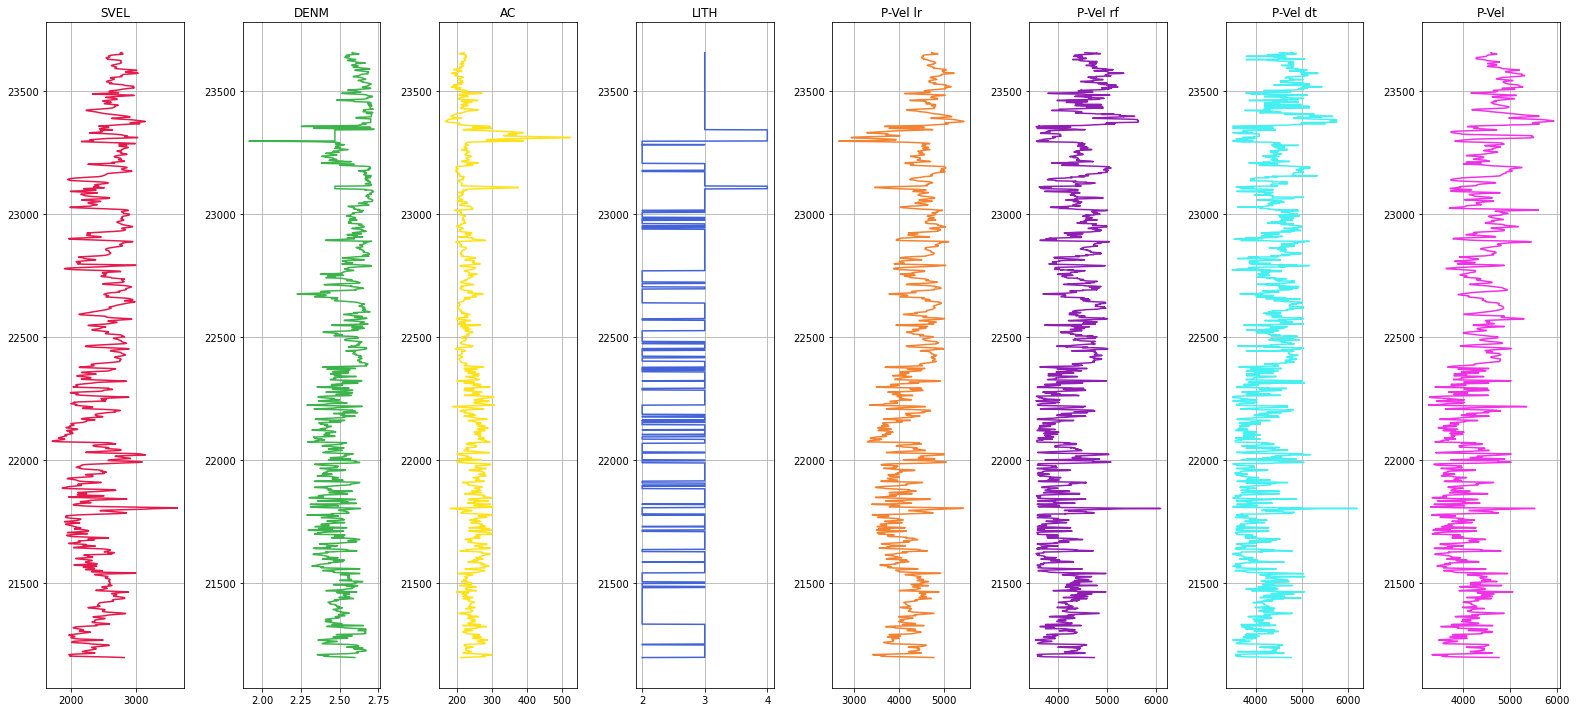

In [36]:
logs =  ['SVEL', 'DENM', 'AC', 'LITH', 'P-Vel lr', 'P-Vel rf', 'P-Vel dt', 'P-Vel']
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(22,10))
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6']

for i in range(len(logs)):
    if i == 8:
        ax[i].semilogx(val[logs[i]], val.index.values, color=colors[i])
    else:
    # for non-resistivity, normal plot
        ax[i].plot(val[logs[i]], val.index.values, color=colors[i])
    
    ax[i].set_title(logs[i])
    ax[i].grid(True)
    #ax[i].set_ylim([3100, 3200])
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show()

# fig.savefig('display.png')